<a href="https://colab.research.google.com/github/Prit1000/Python_basics/blob/main/Python_simultion_four_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# 1. CONFIGURATION
np.random.seed(42)

tickers = ["AAPL", "MSFT", "TSLA", "SP500"]
n_years = 5
trading_days_per_year = 252
n_days = n_years * trading_days_per_year

In [4]:
# Portfolio A: 40% AAPL, 30% MSFT, 30% TSLA
weights = np.array([0.4, 0.3, 0.3])  # AAPL, MSFT, TSLA
portfolio_value = 1_000_000  # 1 million
rf_annual = 0.03  # 3% risk free rate

2. SET "REALISTIC" ANNUAL PARAMETERS FOR MEAN AND VOL (ROUGH APPROXIMATIONS)

In [5]:
# Annual expected returns (approx)
mu_annual = np.array([
    0.15,  # AAPL
    0.14,  # MSFT
    0.25,  # TSLA
    0.09   # SP500
])

# Annual volatility (standard deviation)
sigma_annual = np.array([
    0.30,  # AAPL
    0.25,  # MSFT
    0.60,  # TSLA
    0.18   # SP500
])

# Correlation matrix between the four assets
corr_matrix = np.array([
    [1.00, 0.80, 0.65, 0.85],  # AAPL
    [0.80, 1.00, 0.60, 0.85],  # MSFT
    [0.65, 0.60, 1.00, 0.70],  # TSLA
    [0.85, 0.85, 0.70, 1.00]   # SP500
])


In [6]:
# Convert annual parameters to daily
mu_daily = mu_annual / trading_days_per_year
sigma_daily = sigma_annual / np.sqrt(trading_days_per_year)

# Covariance matrix for daily returns
D = np.diag(sigma_daily)
cov_daily = D @ corr_matrix @ D  # Σ = D * Corr * D

In [7]:
print(D)
print()
print(cov_daily)

[[0.01889822 0.         0.         0.        ]
 [0.         0.01574852 0.         0.        ]
 [0.         0.         0.03779645 0.        ]
 [0.         0.         0.         0.01133893]]

[[0.00035714 0.0002381  0.00046429 0.00018214]
 [0.0002381  0.00024802 0.00035714 0.00015179]
 [0.00046429 0.00035714 0.00142857 0.0003    ]
 [0.00018214 0.00015179 0.0003     0.00012857]]


3. SIMULATE DAILY LOG RETURNS

In [8]:
# Multivariate normal simulation for log returns
log_returns = np.random.multivariate_normal(
    mean=mu_daily,
    cov=cov_daily,
    size=n_days
)
log_returns

array([[-3.37298453e-03, -9.85360848e-03, -1.88414606e-02,
         2.03872577e-03],
       [ 1.39930014e-02, -4.59801308e-03,  7.39189347e-03,
         5.39208979e-03],
       [-6.36482572e-06,  4.48051694e-03,  2.29252446e-02,
         5.17683720e-04],
       ...,
       [-2.62488170e-02, -9.49222677e-03, -4.65383649e-02,
        -5.45782128e-03],
       [-1.42891034e-02, -2.02464007e-02, -2.20806089e-02,
        -5.73631636e-05],
       [-1.68335608e-02, -2.84483828e-02, -8.54993973e-02,
        -1.63810273e-02]])

In [9]:
# Convert log returns to simple returns
simple_returns = np.exp(log_returns) - 1
simple_returns

array([[-3.36730241e-03, -9.80522075e-03, -1.86650698e-02,
         2.04080539e-03],
       [ 1.40913617e-02, -4.58745840e-03,  7.41928095e-03,
         5.40665327e-03],
       [-6.36480546e-06,  4.49056946e-03,  2.31900477e-02,
         5.17817742e-04],
       ...,
       [-2.59073114e-02, -9.44731779e-03, -4.54720605e-02,
        -5.44295443e-03],
       [-1.41874987e-02, -2.00428186e-02, -2.18386167e-02,
        -5.73615184e-05],
       [-1.66926681e-02, -2.80475376e-02, -8.19463037e-02,
        -1.62475879e-02]])

 4. BUILD PRICE PATHS FROM RETURNS

In [10]:
dates = pd.bdate_range(start="2018-01-01", periods=n_days)

# Choose arbitrary but reasonable starting prices
start_prices = np.array([150.0, 300.0, 250.0, 2700.0])

In [12]:
prices = pd.DataFrame(
    data=np.zeros_like(simple_returns),
    index=dates,
    columns=tickers
)
prices

,AAPL,MSFT,TSLA,SP500
2018-01-01,0.0,0.0,0.0,0.0
2018-01-02,0.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,0.0,0.0
2018-01-04,0.0,0.0,0.0,0.0
2018-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...
2022-10-24,0.0,0.0,0.0,0.0
2022-10-25,0.0,0.0,0.0,0.0
2022-10-26,0.0,0.0,0.0,0.0
2022-10-27,0.0,0.0,0.0,0.0


In [13]:
prices.iloc[0] = start_prices
for t in range(1, n_days):
    prices.iloc[t] = prices.iloc[t - 1] * (1 + simple_returns[t])
prices

,AAPL,MSFT,TSLA,SP500
2018-01-01,150.000000,300.000000,250.000000,2700.000000
2018-01-02,152.113704,298.623762,251.854820,2714.597964
2018-01-03,152.112736,299.964753,257.695346,2716.003631
2018-01-04,153.394354,307.621107,251.722001,2735.068660
2018-01-05,154.780681,312.804411,262.339970,2744.013864
...,...,...,...,...
2022-10-24,135.636813,446.864800,276.996148,3229.493054
2022-10-25,132.218880,443.043931,252.397097,3180.059278
2022-10-26,128.793445,438.858354,240.920081,3162.750361
2022-10-27,126.966188,430.062396,235.658719,3162.568940


from matplotlib import pyplot as plt
prices['AAPL'].plot(kind='hist', bins=20, title='AAPL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices['MSFT'].plot(kind='hist', bins=20, title='MSFT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices['TSLA'].plot(kind='hist', bins=20, title='TSLA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices['SP500'].plot(kind='hist', bins=20, title='SP500')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices.plot(kind='scatter', x='AAPL', y='MSFT', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices.plot(kind='scatter', x='MSFT', y='TSLA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices.plot(kind='scatter', x='TSLA', y='SP500', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
prices['AAPL'].plot(kind='line', figsize=(8, 4), title='AAPL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prices['MSFT'].plot(kind='line', figsize=(8, 4), title='MSFT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prices['TSLA'].plot(kind='line', figsize=(8, 4), title='TSLA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
prices['SP500'].plot(kind='line', figsize=(8, 4), title='SP500')
plt.gca().spines[['top', 'right']].set_visible(False)

In [14]:
# Recompute daily simple returns from prices (for safety and clarity)
returns = prices.pct_change().dropna()
returns

,AAPL,MSFT,TSLA,SP500
2018-01-02,0.014091,-0.004587,0.007419,0.005407
2018-01-03,-0.000006,0.004491,0.023190,0.000518
2018-01-04,0.008425,0.025524,-0.023180,0.007020
2018-01-05,0.009038,0.016850,0.042181,0.003271
2018-01-08,-0.017178,-0.012726,-0.053178,-0.017791
...,...,...,...,...
2022-10-24,0.009561,0.011199,-0.002593,-0.001737
2022-10-25,-0.025199,-0.008550,-0.088806,-0.015307
2022-10-26,-0.025907,-0.009447,-0.045472,-0.005443
2022-10-27,-0.014187,-0.020043,-0.021839,-0.000057


 5. BASIC STATISTICS: VARIANCE, STD DEV, COVARIANCE MATRIX

In [15]:
var_daily = returns.var()
std_daily = returns.std()
cov_matrix = returns.cov()

print("Daily variance of each asset:")
print(var_daily)
print("\nDaily standard deviation of each asset:")
print(std_daily)
print("\nDaily covariance matrix:")
print(cov_matrix)


Daily variance of each asset:
AAPL     0.000346
MSFT     0.000235
TSLA     0.001343
SP500    0.000124
dtype: float64

Daily standard deviation of each asset:
AAPL     0.018602
MSFT     0.015332
TSLA     0.036644
SP500    0.011138
dtype: float64

Daily covariance matrix:
           AAPL      MSFT      TSLA     SP500
AAPL   0.000346  0.000225  0.000422  0.000175
MSFT   0.000225  0.000235  0.000321  0.000143
TSLA   0.000422  0.000321  0.001343  0.000279
SP500  0.000175  0.000143  0.000279  0.000124


6. BETA OF EACH STOCK VS SP500

In [16]:
market_returns = returns["SP500"]

betas = {}
for ticker in ["AAPL", "MSFT", "TSLA"]:
    cov_with_market = returns[ticker].cov(market_returns)
    var_market = market_returns.var()
    beta = cov_with_market / var_market
    betas[ticker] = beta
print("\nBetas vs SP500:")
for t, b in betas.items():
    print(f"{t}: {b:.3f}")


Betas vs SP500:
AAPL: 1.413
MSFT: 1.151
TSLA: 2.246


PORTFOLIO RETURNS, VARIANCE, BETA

In [17]:
stock_returns_matrix = returns[["AAPL", "MSFT", "TSLA"]].values
portfolio_returns = stock_returns_matrix @ weights

portfolio_var_daily = np.var(portfolio_returns, ddof=1)
portfolio_std_daily = np.std(portfolio_returns, ddof=1)

portfolio_var_annual = portfolio_var_daily * trading_days_per_year
portfolio_std_annual = portfolio_std_daily * np.sqrt(trading_days_per_year)

In [18]:
# Portfolio beta (direct covariance approach)
cov_portfolio_market = np.cov(portfolio_returns, market_returns)[0, 1]
var_market = np.var(market_returns, ddof=1)
portfolio_beta = cov_portfolio_market / var_market

In [19]:
print("\nPortfolio daily variance:", portfolio_var_daily)
print("Portfolio daily std dev:", portfolio_std_daily)
print("Portfolio annual variance:", portfolio_var_annual)
print("Portfolio annual std dev:", portfolio_std_annual)
print("Portfolio beta vs SP500:", portfolio_beta)


Portfolio daily variance: 0.00041039144131087025
Portfolio daily std dev: 0.020258120379513748
Portfolio annual variance: 0.1034186432103393
Portfolio annual std dev: 0.32158769132281684
Portfolio beta vs SP500: 1.5841666378072206


8. HISTORICAL VAR AND EXPECTED SHORTFALL (CVaR)

In [20]:
def historical_var(returns_array, alpha=0.95):
    """
    Historical Value at Risk.
    For alpha = 0.95 we look at the 5th percentile of returns.
    Positive number means loss.
    """
    percentile = 100 * (1 - alpha)
    var_level = np.percentile(returns_array, percentile)
    return -var_level

In [21]:
def expected_shortfall(returns_array, alpha=0.95):
    """
    Expected shortfall (CVaR) conditioned on returns being below VaR.
    """
    percentile = 100 * (1 - alpha)
    var_level = np.percentile(returns_array, percentile)
    tail_losses = returns_array[returns_array <= var_level]
    return -tail_losses.mean()

In [22]:
for alpha in [0.95, 0.99]:
    var = historical_var(portfolio_returns, alpha)
    es = expected_shortfall(portfolio_returns, alpha)
    print(f"\nPortfolio {int(alpha*100)}% daily VaR (return): {var:.4%}")
    print(f"Portfolio {int(alpha*100)}% daily Expected Shortfall (return): {es:.4%}")
    print(f"Monetary VaR for portfolio value {portfolio_value:,.0f}: {var * portfolio_value:,.0f}")
    print(f"Monetary ES for portfolio value {portfolio_value:,.0f}: {es * portfolio_value:,.0f}")



Portfolio 95% daily VaR (return): 3.4112%
Portfolio 95% daily Expected Shortfall (return): 4.0456%
Monetary VaR for portfolio value 1,000,000: 34,112
Monetary ES for portfolio value 1,000,000: 40,456

Portfolio 99% daily VaR (return): 4.5796%
Portfolio 99% daily Expected Shortfall (return): 5.0805%
Monetary VaR for portfolio value 1,000,000: 45,796
Monetary ES for portfolio value 1,000,000: 50,805


SHARPE RATIO

In [23]:
mean_portfolio_return_daily = np.mean(portfolio_returns)
rf_daily = rf_annual / trading_days_per_year

excess_return_daily = mean_portfolio_return_daily - rf_daily
sharpe_daily = excess_return_daily / portfolio_std_daily
sharpe_annual = sharpe_daily * np.sqrt(trading_days_per_year)

print("\nPortfolio mean daily return:", mean_portfolio_return_daily)
print("Portfolio daily Sharpe ratio:", sharpe_daily)
print("Portfolio annual Sharpe ratio:", sharpe_annual)


Portfolio mean daily return: 0.00029133571059097
Portfolio daily Sharpe ratio: 0.008504643486943598
Portfolio annual Sharpe ratio: 0.13500702993430774


10. ROLLING BETA (TIME VARYING BETA)

In [24]:
window = 60  # 60 trading days ~ 3 months

rolling_beta_aapl = (
    returns["AAPL"]
    .rolling(window)
    .cov(market_returns)
    / market_returns.rolling(window).var()
)

rolling_beta_msft = (
    returns["MSFT"]
    .rolling(window)
    .cov(market_returns)
    / market_returns.rolling(window).var()
)

rolling_beta_tsla = (
    returns["TSLA"]
    .rolling(window)
    .cov(market_returns)
    / market_returns.rolling(window).var()
)

 11. PLOTS

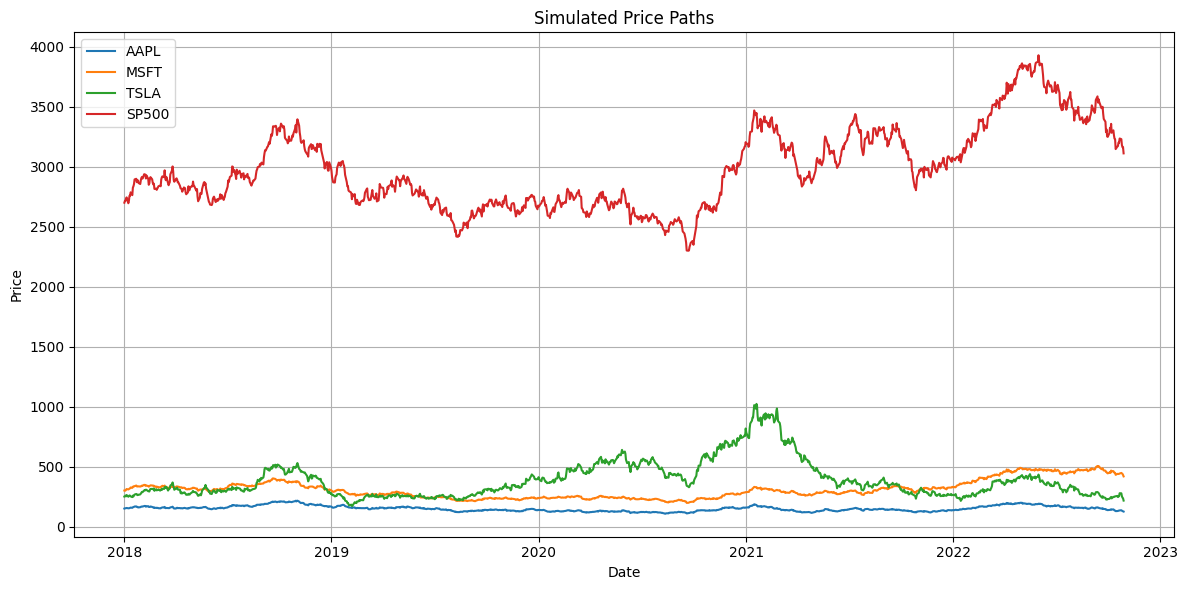

In [25]:
plt.figure(figsize=(12, 6))
for t in tickers:
    plt.plot(prices.index, prices[t], label=t)
plt.title("Simulated Price Paths")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

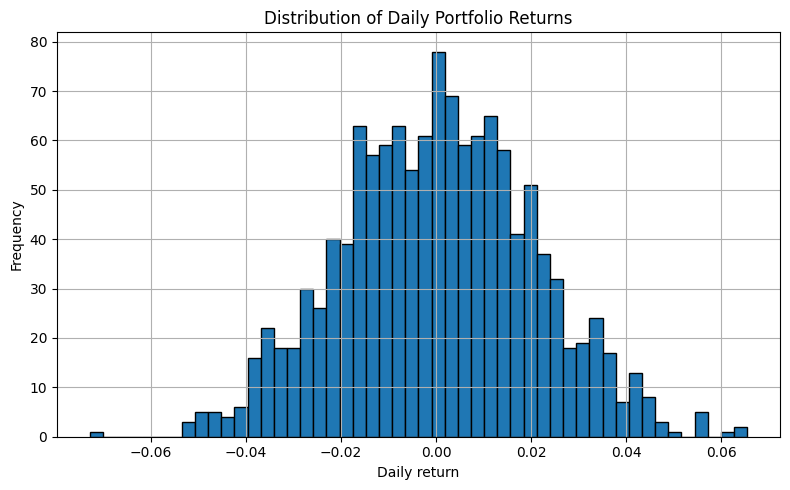

In [26]:
plt.figure(figsize=(8, 5))
plt.hist(portfolio_returns, bins=50, edgecolor="black")
plt.title("Distribution of Daily Portfolio Returns")
plt.xlabel("Daily return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

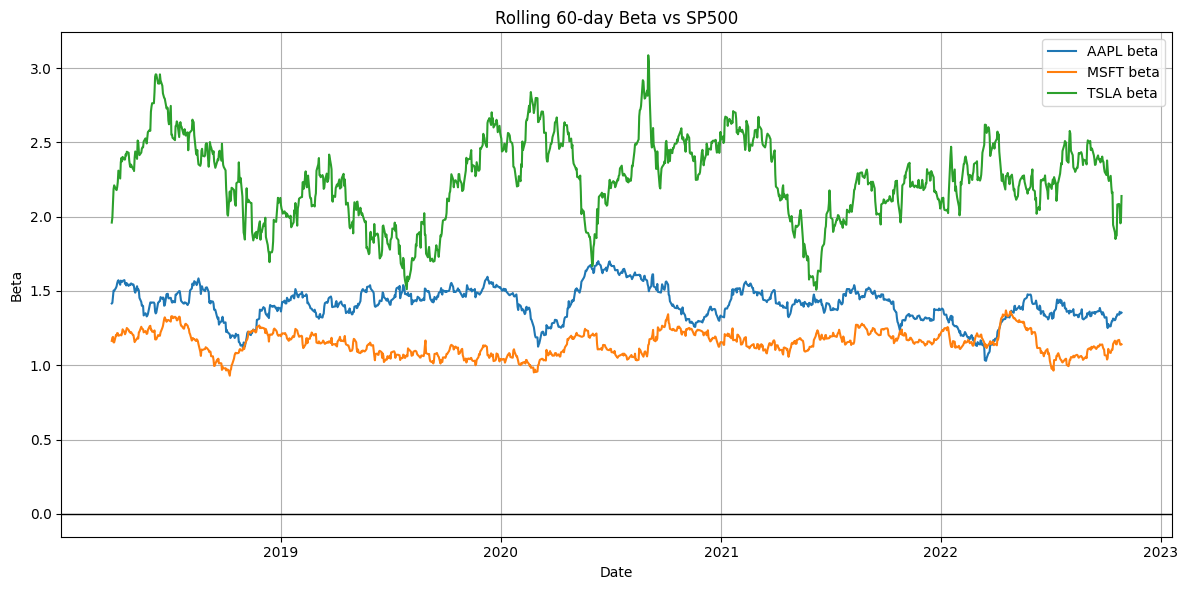

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_aapl.index, rolling_beta_aapl, label="AAPL beta")
plt.plot(rolling_beta_msft.index, rolling_beta_msft, label="MSFT beta")
plt.plot(rolling_beta_tsla.index, rolling_beta_tsla, label="TSLA beta")
plt.axhline(0, color="black", linewidth=1)
plt.title(f"Rolling {window}-day Beta vs SP500")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()